#### LGBM

Classifier

In [13]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate

In [4]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=123)

In [39]:
lgbmc_model = LGBMClassifier(n_estimators=3500)
evals = [(X_test, y_test)]
lgbmc_model.fit(X_train, y_train,
                eval_metric='logloss',
                eval_set=evals)

e_result = lgbmc_model.evals_result_
print(e_result)
preds = lgbmc_model.predict(X_test)

{'valid_0': OrderedDict({'binary_logloss': [np.float64(0.6016174453161853), np.float64(0.5364806286241803), np.float64(0.48557474102904274), np.float64(0.4407192210331869), np.float64(0.4039681810620312), np.float64(0.3680254476120077), np.float64(0.3405892084371723), np.float64(0.3138382471130075), np.float64(0.2880769294938111), np.float64(0.26782743047265345), np.float64(0.2532325308293439), np.float64(0.2377192161928067), np.float64(0.226770408315975), np.float64(0.21261160069351198), np.float64(0.20450838115193842), np.float64(0.19472937838208024), np.float64(0.18907279684356415), np.float64(0.18100495885404197), np.float64(0.17293336630669087), np.float64(0.16889802323599135), np.float64(0.16147814559024573), np.float64(0.15373976535050848), np.float64(0.14954480562837033), np.float64(0.1459249257815744), np.float64(0.14150479409396327), np.float64(0.1395224435604097), np.float64(0.13657360837092222), np.float64(0.13213385300037056), np.float64(0.13045813114139343), np.float64(0.

c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [7]:
c_v = cross_validate(estimator=lgbmc_model,
                     X=iris.data,
                     y=iris.target,
                     cv=5)

print(f'AVG fit time : {c_v['fit_time'].mean()}')
print(f'AVG score time : {c_v['score_time'].mean()}')
print(f'AVG test score : {c_v['test_score'].mean()}')

c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


AVG fit time : 1.6601614475250244
AVG score time : 0.002808809280395508
AVG test score : 0.9600000000000002


c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [8]:
import pandas as pd

features = iris.data
label = iris.target

iris_df = pd.DataFrame(data=features, columns=iris.feature_names)
iris_df['target']=label
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

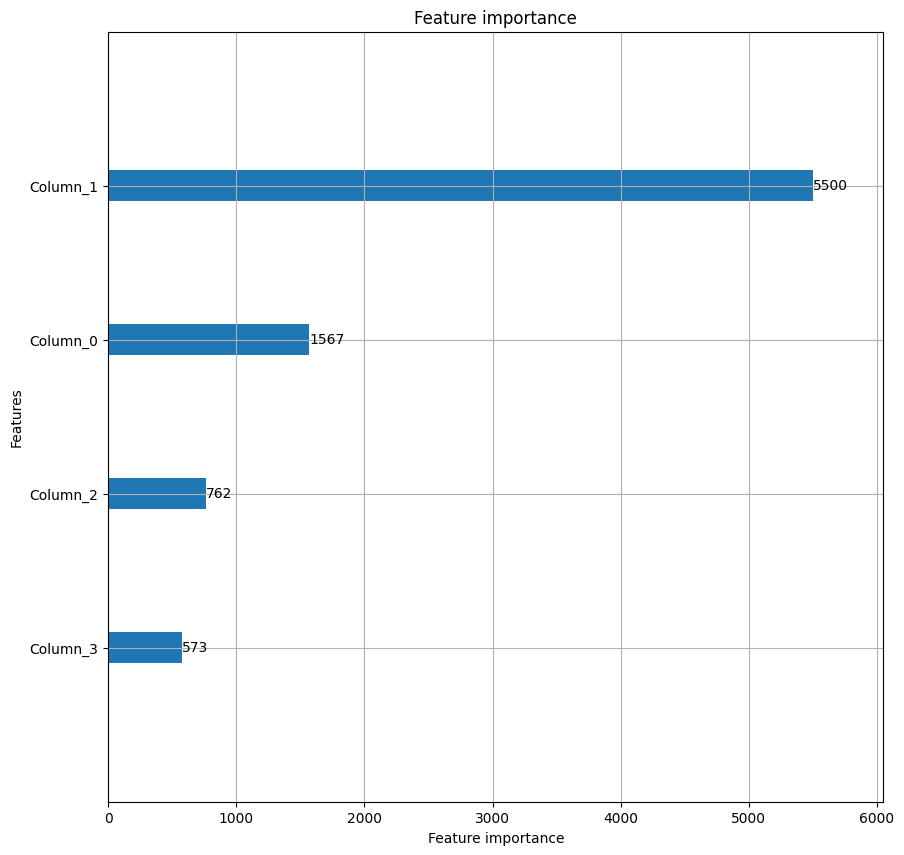

In [11]:
plot_importance(lgbmc_model, figsize=(10,10))

<Axes: >

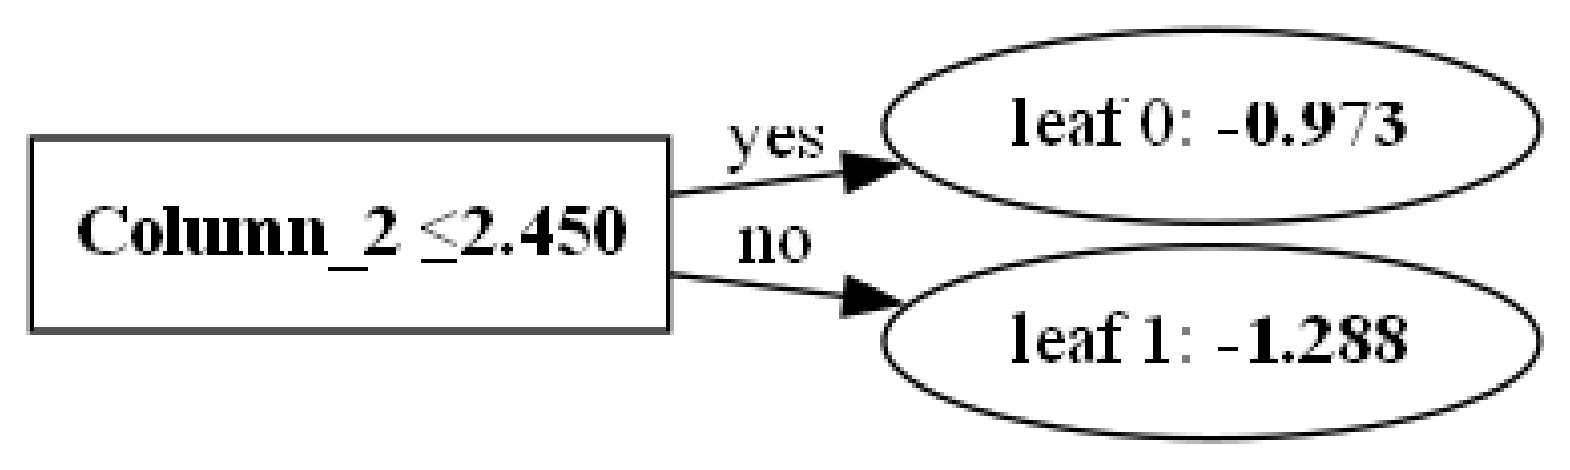

In [12]:
plot_tree(lgbmc_model, figsize=(20,18))

Regressor

In [16]:
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data,
                                                    housing.target,
                                                    test_size=0.25,
                                                    random_state=123)

In [38]:
lgbmr_model = LGBMRegressor(n_estimators=1000)
evals_h = [(X_test, y_test)]
lgbmr_model.fit(X_train, y_train,
                eval_metric='mse',
                eval_set=evals_h,
                )
e_result = lgbmr_model.evals_result_
print(e_result)
preds = lgbmr_model.predict(X_test)


{'valid_0': OrderedDict({'l2': [np.float64(0.20716763791188103), np.float64(0.17634932375174162), np.float64(0.15237040400097973), np.float64(0.13023469963708623), np.float64(0.11373275279440358), np.float64(0.10054183706446708), np.float64(0.08951695442799813), np.float64(0.07867274867902603), np.float64(0.0711473427455281), np.float64(0.06503173304729569), np.float64(0.06011936876817785), np.float64(0.05637354814802532), np.float64(0.05286252453012746), np.float64(0.048907886596708326), np.float64(0.0460069908164455), np.float64(0.04329734631460089), np.float64(0.041825930460715394), np.float64(0.039594268186699595), np.float64(0.037050524871738044), np.float64(0.036211022659377236), np.float64(0.03504728306572625), np.float64(0.033576979239722436), np.float64(0.03287475219583449), np.float64(0.03231275538980534), np.float64(0.03125900164590463), np.float64(0.030512531388788313), np.float64(0.030199865052816598), np.float64(0.029736716104638586), np.float64(0.02924374753982228), np.f

c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [22]:
c_v_h = cross_validate(estimator=lgbmr_model,
                       X=housing.data,
                       y=housing.target,
                       cv=5)

print(f"AVG fit time : {c_v_h['fit_time'].mean()}")
print(f"AVG score time : {c_v_h['score_time'].mean()}")
print(f"AVG test score : {c_v_h['test_score'].mean()}")

c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


AVG fit time : 0.6923227787017823
AVG score time : 0.031294822692871094
AVG test score : 0.6821681451991967


c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [27]:
from sklearn.metrics import mean_squared_error

y_pred = lgbmr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"mse : {mse}")

mse : 0.18786944928959654


c:\Users\main\miniconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

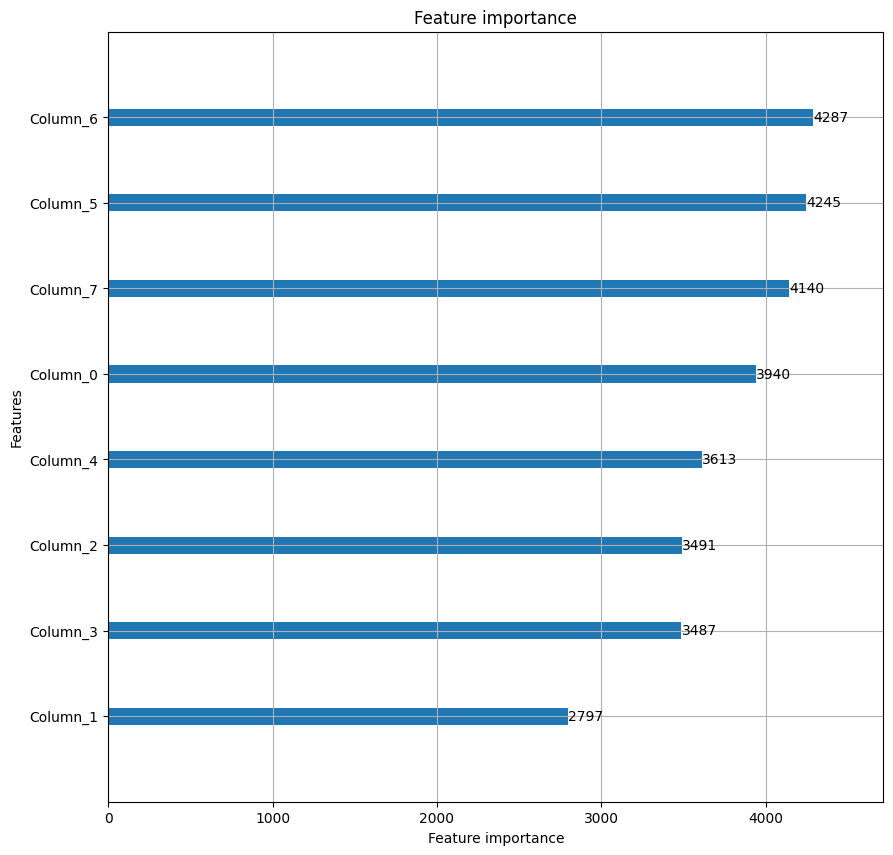

In [28]:
plot_importance(lgbmr_model, figsize=(10,10))

<Axes: >

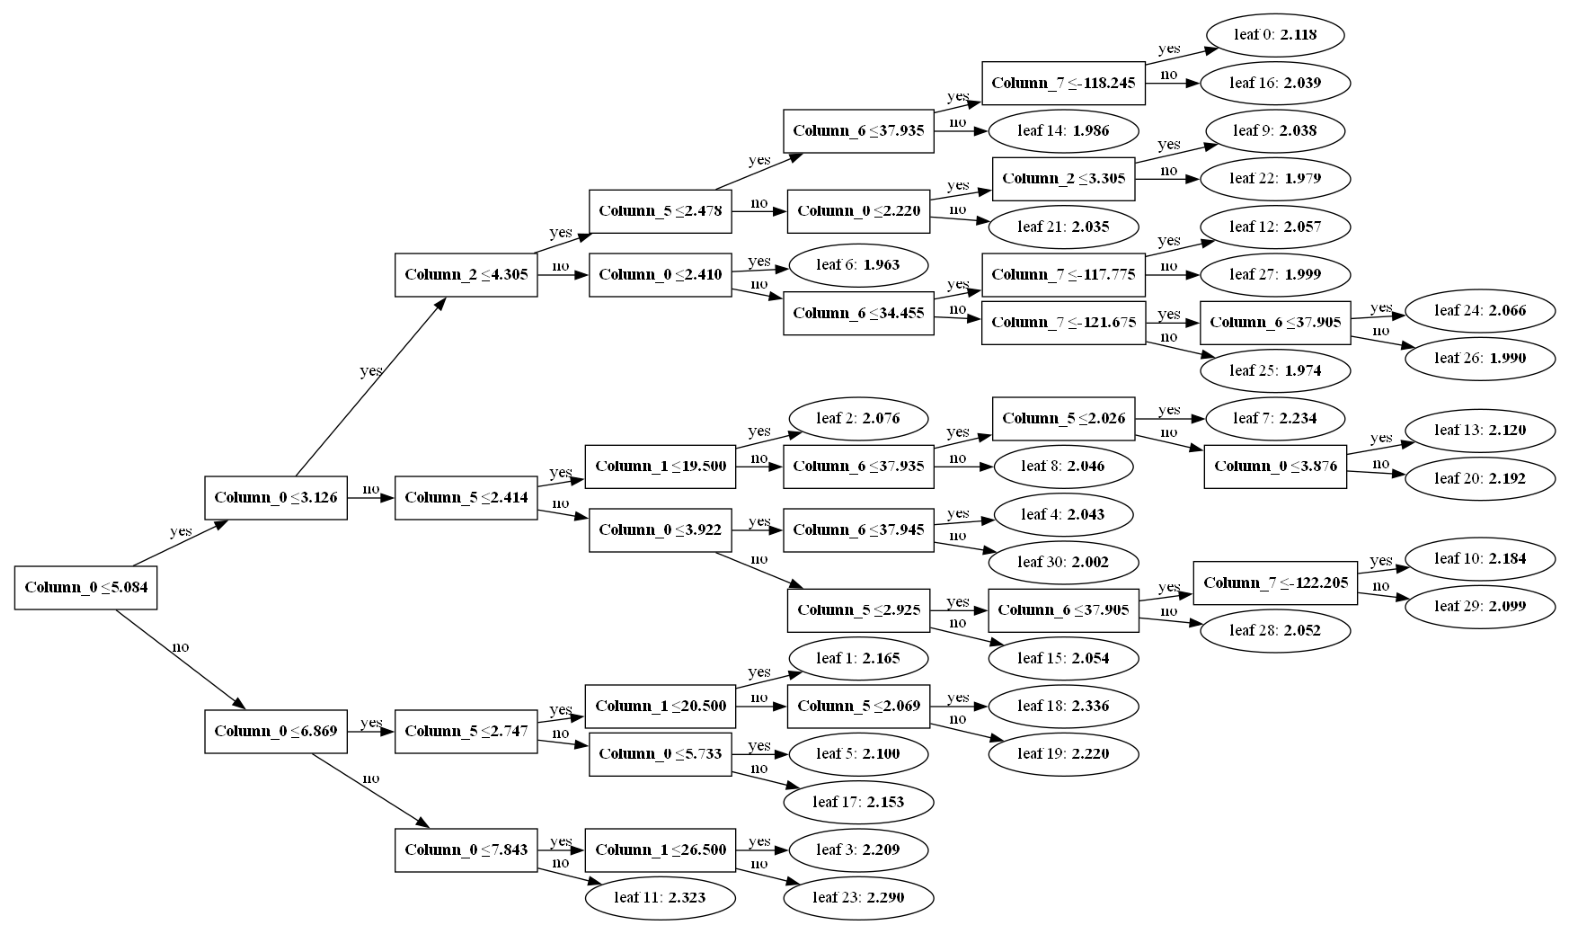

In [29]:
plot_tree(lgbmr_model, figsize=(20,18))

#### Cat Boost

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

In [31]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)

modelc = CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', random_seed=42)

modelc.fit(X_train, y_train)

print(f"Acc : {modelc.score(X_test, y_test)}")

Learning rate set to 0.00736
0:	total: 93ms	remaining: 1m 32s
1:	total: 95.4ms	remaining: 47.6s
2:	total: 97.6ms	remaining: 32.4s
3:	total: 99.9ms	remaining: 24.9s
4:	total: 102ms	remaining: 20.4s
5:	total: 105ms	remaining: 17.4s
6:	total: 107ms	remaining: 15.2s
7:	total: 110ms	remaining: 13.7s
8:	total: 113ms	remaining: 12.4s
9:	total: 116ms	remaining: 11.4s
10:	total: 118ms	remaining: 10.7s
11:	total: 122ms	remaining: 10s
12:	total: 125ms	remaining: 9.46s
13:	total: 128ms	remaining: 8.98s
14:	total: 130ms	remaining: 8.57s
15:	total: 134ms	remaining: 8.23s
16:	total: 137ms	remaining: 7.91s
17:	total: 140ms	remaining: 7.63s
18:	total: 143ms	remaining: 7.38s
19:	total: 146ms	remaining: 7.14s
20:	total: 148ms	remaining: 6.92s
21:	total: 151ms	remaining: 6.71s
22:	total: 154ms	remaining: 6.53s
23:	total: 157ms	remaining: 6.38s
24:	total: 160ms	remaining: 6.23s
25:	total: 162ms	remaining: 6.08s
26:	total: 165ms	remaining: 5.95s
27:	total: 168ms	remaining: 5.82s
28:	total: 170ms	remaining: 

In [ ]:
from sklearn.metrics import classification_report

y_pred = modelc.predict(X_test)

# 상세 리포트
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
from catboost import Pool
import matplotlib.pyplot as plt
import numpy as np

# Pool 객체 생성
pool = Pool(data=X_train, label=y_train)

# 다시 모델 학습 pool 이용
modelc.fit(pool)

# 피처 중요도 추출
feature_importance = modelc.get_feature_importance(pool)

Learning rate set to 0.00736
0:	total: 5ms	remaining: 4.99s
1:	total: 8.1ms	remaining: 4.04s
2:	total: 10.8ms	remaining: 3.58s
3:	total: 13.1ms	remaining: 3.26s
4:	total: 15.4ms	remaining: 3.07s
5:	total: 18.1ms	remaining: 3.01s
6:	total: 21.1ms	remaining: 2.99s
7:	total: 24.2ms	remaining: 3s
8:	total: 27.3ms	remaining: 3s
9:	total: 30.5ms	remaining: 3.02s
10:	total: 33.6ms	remaining: 3.02s
11:	total: 36.8ms	remaining: 3.03s
12:	total: 39.9ms	remaining: 3.02s
13:	total: 43.2ms	remaining: 3.04s
14:	total: 46.3ms	remaining: 3.04s
15:	total: 49.5ms	remaining: 3.05s
16:	total: 52.7ms	remaining: 3.05s
17:	total: 55.5ms	remaining: 3.03s
18:	total: 58.3ms	remaining: 3.01s
19:	total: 61.3ms	remaining: 3s
20:	total: 64ms	remaining: 2.98s
21:	total: 66.9ms	remaining: 2.98s
22:	total: 69.8ms	remaining: 2.96s
23:	total: 72.7ms	remaining: 2.95s
24:	total: 75.8ms	remaining: 2.95s
25:	total: 78.7ms	remaining: 2.95s
26:	total: 81.5ms	remaining: 2.94s
27:	total: 84.3ms	remaining: 2.93s
28:	total: 87ms	

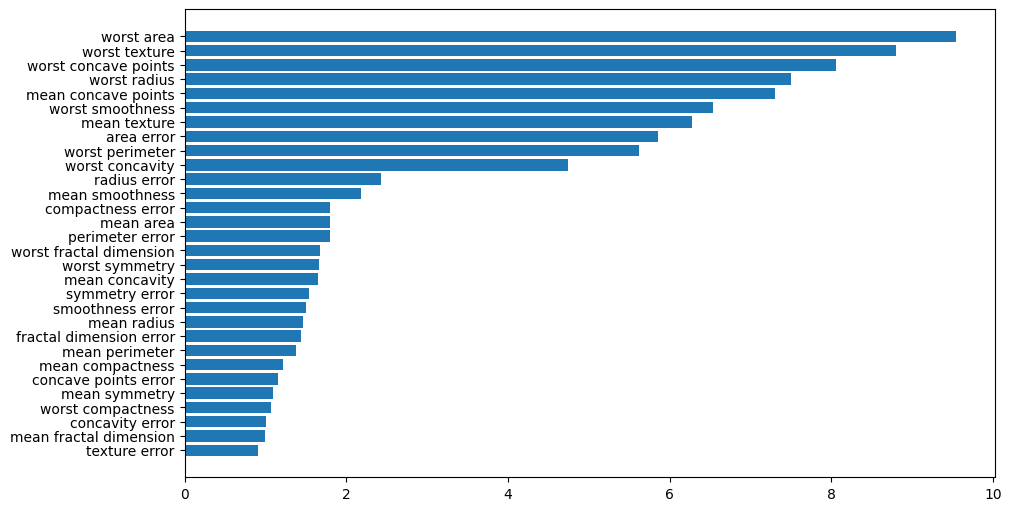

In [ ]:
# 피처 이름 정렬
sorted_idx = np.argsort(feature_importance)[::1]
sorted_feature_names = cancer.feature_names[sorted_idx]
sorted_feature_importance = feature_importance[sorted_idx]

# 시각화
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.barh(range(len(sorted_feature_importance)), sorted_feature_importance)
ax.set_yticks(range(len(sorted_feature_importance)))
ax.set_yticklabels(sorted_feature_names)
plt.show()